In [1]:

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torchvision.io.image")

import torch
import numpy as np


import torchvision
from torchvision import models

import torch.nn as nn

from skimage import io

import random
import time
import os.path


import matplotlib.pyplot as plt
from IPython.display import clear_output


from sklearn.metrics import accuracy_score
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


import torch.optim as optim
import torch.optim.lr_scheduler
import torch.nn.init
from torch.autograd import Variable
from torch.optim.lr_scheduler import ReduceLROnPlateau


In [2]:
import sys
sys.path.append('../')
from src import *

In [3]:
data_folder = 'C:/dev/EuroSAT/'
root = os.path.join(data_folder, '2750/')

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
lr = 0.001             
milestones = [50,75,90] 
num_epochs = 100            

In [6]:
if __name__ == '__main__':
    torch.manual_seed(0)
    np.random.seed(0)
    torch.cuda.manual_seed(0)
    random.seed(0)
    
    print("pytorch version", torch.__version__)
    
    criteria = torch.nn.CrossEntropyLoss()
    resnet_model = Load_model(resnet_val=50, device = device)
    train_loader, val_loader = make_dataloaders(root, batch_size_val=128)
    
    resnet_model=resnet_model.to(device)
    
    optimizer = optim.Adam(resnet_model.parameters(), lr=lr, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
    
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=4, verbose=True)
    #scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=0.1)

pytorch version 2.1.2
Model Loaded


In [7]:
len(train_loader.dataset), len(val_loader.dataset)

(24300, 2700)

In [8]:
save_folder_addr = '../res50sch/'

if not os.path.exists(save_folder_addr):
    os.makedirs(save_folder_addr)

In [9]:
import hashlib

val_data_string = str(val_loader.dataset)
val_data_hash = hashlib.sha256(val_data_string.encode()).hexdigest()

with open(save_folder_addr + 'val_data_hash.txt', 'w') as file:
    file.write(val_data_hash)
    file.close()

print(val_data_hash)

71aed80bf63e52ddddbcba97c1eb0277ec019597ee778a114c8a265b8bdb2283


In [12]:
lr = 0.0001
 
optimizer = optim.Adam(resnet_model.parameters(), lr=lr, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, threshold = 0.1, verbose=True)



Iteration Number 7840 11.266007900238037 seconds
Train (epoch 42/100) [91/189 (48%)]	Loss: 0.057019	Accuracy: 0.9765625	Learning Rate:1.0000000000000004e-08


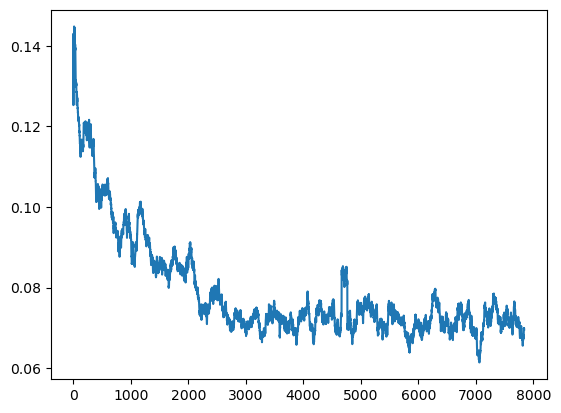

validation accuracy : 0.9438244047619048


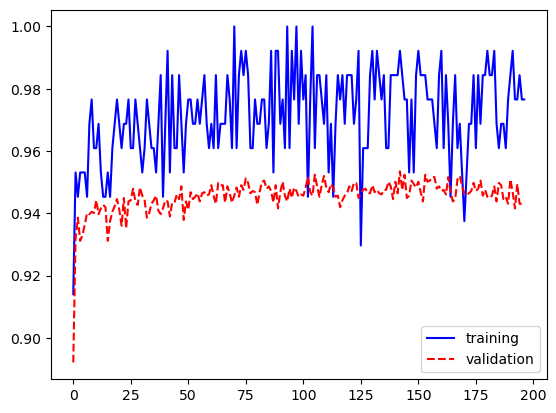

KeyboardInterrupt: 

In [13]:
resnet_model = train(resnet_model, train_loader, val_loader, criteria, optimizer, num_epochs, scheduler, device = device, save_path=save_folder_addr)